# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_dir = '/content/drive/MyDrive/Mini-MIAS'

In [ ]:
file= open(image_dir+"/Info.txt","r+")
strings=file.readlines()[103:]
l=[]
for i in range(len(strings)-2):
  string=strings[i].split(" ")[:2]
  l.append(string)
res = []
[res.append(x) for x in l if x not in res]
len(res)

322

In [ ]:
l=[]
for i in res:
  l.append(i[1])

In [ ]:
len(l)

322

In [ ]:
lst=os.listdir(image_dir)
lst=lst[1:]

In [ ]:
import matplotlib.pyplot as plt
img_arr=[]
labels=[]
for i in lst:
  with open(image_dir+"/"+i, 'rb') as pgmf:
      im = plt.imread(pgmf)
      n_img_size = cv2.resize(im, (299, 299), interpolation = cv2.INTER_LINEAR)

      # CLAHE algo
      clahe = cv2.createCLAHE(clipLimit = 5)
      clahe_img = clahe.apply(n_img_size) + 30
      # erosion
      kernel = np.ones((5, 5), np.uint8)
      erode_img = cv2.erode(clahe_img, kernel)
      # RGB
      final_img = cv2.cvtColor(erode_img, cv2.COLOR_GRAY2RGB)
      img_arr.append(final_img)
      labels.append(l)
len(img_arr),len(labels)

(322, 322)

In [ ]:
img_array=np.array(img_arr)
label=np.array(labels)

In [ ]:
img_array.shape,label.shape

((322, 299, 299, 3), (322, 322))

In [ ]:
label=label[0]
label.shape

(322,)

In [ ]:
np.save('/content/drive/MyDrive/Mini-MIAS/Temp/299_image_X',img_array)
np.save('/content/drive/MyDrive/Mini-MIAS/Temp/299_image_y',label)

In [ ]:
import numpy as np
X=np.load('/content/drive/MyDrive/Mini-MIAS/Temp/299_image_X.npy')
y=np.load('/content/drive/MyDrive/Mini-MIAS/Temp/299_image_y.npy')
X.shape,y.shape

((322, 299, 299, 3), (322,))

In [ ]:
set(y)

{'D', 'F', 'G'}

In [ ]:
d={'D': 0,
 'F': 1,
 'G': 2}
y=pd.Series(y).map(d).values

In [ ]:
y

array([2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2,
       2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42,stratify=y)

rate = 0.5
num = int(X.shape[0] * rate)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (241, 299, 299, 3)
X_test shape : (81, 299, 299, 3)
y_train shape : (241, 3)
y_test shape : (81, 3)


In [ ]:
del X,y

# Convolution Neural Network

In [ ]:
import tensorflow as tf
tf.random.set_seed(100)

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (299, 299,3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
#tf.keras.layers.MaxPooling2D((3, 3),strides =2),
# tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
# tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(512, activation = 'relu'),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 74, 74, 128)       73856     
                                                                 
 conv2d_106 (Conv2D)         (None, 74, 74, 128)      

In [ ]:
y_train.shape,y_test.shape

((241, 3), (81, 3))

In [ ]:
callback=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Mini-MIAS/Temp/model_299.h5',save_best_only=True,verbose=1,monitor='val_accuracy')

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30 , batch_size = 128,callbacks=[callback])

Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 1379.5223 - accuracy: 0.3734
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to /content/drive/MyDrive/Mini-MIAS/Temp/model_299.h5
2/2 [==============================] - 6s 5s/step - loss: 1379.5223 - accuracy: 0.3734 - val_loss: 1528.0476 - val_accuracy: 0.3333
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 900.5991 - accuracy: 0.3278 
Epoch 2: val_accuracy improved from 0.33333 to 0.34568, saving model to /content/drive/MyDrive/Mini-MIAS/Temp/model_299.h5
2/2 [==============================] - 5s 5s/step - loss: 900.5991 - accuracy: 0.3278 - val_loss: 37.8572 - val_accuracy: 0.3457
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 22.1344 - accuracy: 0.3693
Epoch 3: val_accuracy improved from 0.34568 to 0.41975, saving model to /content/drive/MyDrive/Mini-MIAS/Temp/model_299.h5
2/2 [==============================] - 5s 5s/step - loss: 22.1344 - accuracy: 0.3693 - val

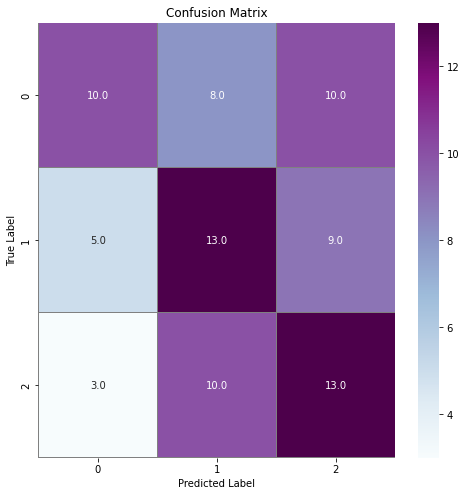

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Transfer Learning

## InceptionV3

In [ ]:
import tensorflow as tf

image_model = tf.keras.applications.InceptionV3(include_top=True,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-2].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
X_train.shape,y_train.shape

((241, 299, 299, 3), (241, 3))

In [ ]:
image_embed=image_features_extract_model.predict(X_train)
image_embed.shape

(241, 2048)

In [ ]:
image_embed_test=image_features_extract_model.predict(X_test)
image_embed_test.shape

(81, 2048)

In [ ]:
np.save('/content/drive/MyDrive/Mini-MIAS/Temp/vector_xtrain',image_embed)
np.save('/content/drive/MyDrive/Mini-MIAS/Temp/vector_xtest',image_embed_test)

In [ ]:
inc_Xtrain=np.load('/content/drive/MyDrive/Mini-MIAS/Temp/vector_xtrain.npy')
inc_Xtest=np.load('/content/drive/MyDrive/Mini-MIAS/Temp/vector_xtest.npy')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_shape=(2048,), activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                32784     
                                                                 
 dense_20 (Dense)            (None, 128)               2176      
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 512)               131584    
                                                                 
 dense_23 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 201,107
Trainable params: 201,107
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callback=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Mini-MIAS/Temp/model_v3.h5',save_best_only=True,verbose=1,monitor='val_accuracy')

In [ ]:
history = model.fit(inc_Xtrain, y_train, validation_data = (inc_Xtest, y_test), epochs =100 , batch_size = 128,callbacks=[callback])

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 1.1131 - accuracy: 0.3359
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to /content/drive/MyDrive/Mini-MIAS/Temp/model_v3.h5
2/2 [==============================] - 1s 546ms/step - loss: 1.2020 - accuracy: 0.3402 - val_loss: 1.1868 - val_accuracy: 0.3333
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 1.1211 - accuracy: 0.3516
Epoch 2: val_accuracy did not improve from 0.33333
2/2 [==============================] - 0s 30ms/step - loss: 1.2467 - accuracy: 0.3071 - val_loss: 1.1759 - val_accuracy: 0.2963
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 1.1693 - accuracy: 0.3281
Epoch 3: val_accuracy did not improve from 0.33333
2/2 [==============================] - 0s 27ms/step - loss: 1.1390 - accuracy: 0.3361 - val_loss: 1.1597 - val_accuracy: 0.3333
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 1.1490 - accuracy: 0.3516
Epoch 4: val_accuracy 

# Final Model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [ ]:
cnn_model1=load_model('/content/drive/MyDrive/Mini-MIAS/Temp/model_299.h5')
cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 128)       1

In [ ]:
inc_Xtrain.shape,inc_Xtest.shape

((241, 2048), (81, 2048))

In [ ]:
cnn_extractor1=Model(inputs=cnn_model1.input,outputs=cnn_model1.get_layer('dense_1').output)
cnn_extractor1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 299, 299, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       7385

In [ ]:
image_embed_train1=cnn_extractor1.predict(X_train)
image_embed_train1.shape

(241, 128)

In [ ]:
image_embed_test1=cnn_extractor1.predict(X_test)
image_embed_test1.shape

(81, 128)

In [ ]:
final_Xtrain1=np.hstack((inc_Xtrain,image_embed_train1))

In [ ]:
final_Xtest1=np.hstack((inc_Xtest,image_embed_test1))

In [ ]:
import numpy as np
y_train1=y_train
y_train1=np.where(y_train1==1)[1]

In [ ]:
import numpy as np
y_test1=y_test
y_test1=np.where(y_test1==1)[1]

# Machine learning Classifier

In [ ]:
import xgboost
from xgboost import XGBClassifier
model1 = XGBClassifier()
# fit the model on the whole dataset
model1.fit(final_Xtrain1,y_train1)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred1 = model1.predict(final_Xtest1)
y_pred1

array([1, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1,
       2, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0,
       2, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred1)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test1, y_pred1))
cm

Accuracy :  0.5061728395061729


array([[10,  9,  9],
       [ 5, 17,  5],
       [ 9,  3, 14]])

# final model classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.42      0.36      0.38        28
           1       0.59      0.63      0.61        27
           2       0.50      0.54      0.52        26

    accuracy                           0.51        81
   macro avg       0.50      0.51      0.50        81
weighted avg       0.50      0.51      0.50        81



# CNN classification report

In [ ]:
cnn_mod=load_model('/content/drive/MyDrive/Mini-MIAS/Temp/model_299.h5')
cnn_mod.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 74, 74, 128)       73856     
                                                                 
 conv2d_106 (Conv2D)         (None, 74, 74, 128)      

In [ ]:
y_pred = cnn_mod.predict(X_test)

In [ ]:
y_pred_classes = np.argmax(y_pred,axis = 1)

In [ ]:
y_test2=np.argmax(y_test,axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred_classes))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58        28
           1       0.55      0.41      0.47        27
           2       0.41      0.42      0.42        26

    accuracy                           0.49        81
   macro avg       0.50      0.49      0.49        81
weighted avg       0.50      0.49      0.49        81



In [ ]:
mod=load_model('/content/drive/MyDrive/Mini-MIAS/Temp/model_v3.h5')
mod.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                32784     
                                                                 
 dense_20 (Dense)            (None, 128)               2176      
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 512)               131584    
                                                                 
 dense_23 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 201,107
Trainable params: 201,107
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = mod.predict(inc_Xtest)

In [ ]:
y_pred_classes = np.argmax(y_pred,axis = 1)

In [ ]:
y_test2=np.argmax(y_test,axis = 1)

# inception classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred_classes))

              precision    recall  f1-score   support

           0       0.44      0.57      0.50        28
           1       0.49      0.78      0.60        27
           2       1.00      0.08      0.14        26

    accuracy                           0.48        81
   macro avg       0.64      0.48      0.41        81
weighted avg       0.64      0.48      0.42        81



# Results

In [ ]:
#Results
#CNN :- 49.383%
#InceptionV3 :- 48.148%
#Final Results :- 50.617%